In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [14]:
transforms = transforms.ToTensor()

In [15]:
# load data
mnist_data = datasets.MNIST(root='./data',
                            train=True,
                            download=True,
                            transform=transforms)

# data loader
data_loader = DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)

In [16]:
class Autoencoder(nn.Module):
    def __init__(self):
        '''
        Sisi kiri : encoder
        Ukuran output akan semakin mengecil
        '''
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64), # (N, 128) -> (N, 64)
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # (N, 64) -> (N, 3)
        )

        '''
        Sisi kanan : decoder
        Ukuran output akan semakin membesar
        '''
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64), 
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid() 
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

In [17]:
model = Autoencoder()

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001, weight_decay=0.00001)

In [18]:
# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)

In [19]:
epochs = 10
outputs = []

for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.to(device)
        # jadikan input menjadi 1D (flatten)
        img = img.reshape(-1, 28 * 28)

        recon = model(img)

        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch : { epoch + 1}, Loss : {loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch : 1, Loss : 0.0474
Epoch : 2, Loss : 0.0475
Epoch : 3, Loss : 0.0441
Epoch : 4, Loss : 0.0449
Epoch : 5, Loss : 0.0369
Epoch : 6, Loss : 0.0347
Epoch : 7, Loss : 0.0419
Epoch : 8, Loss : 0.0361
Epoch : 9, Loss : 0.0367
Epoch : 10, Loss : 0.0352


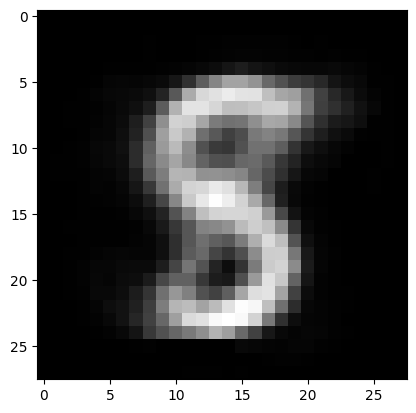

In [21]:
plt.imshow(recon[0].view(28, 28).cpu().detach().numpy(), cmap='gray')

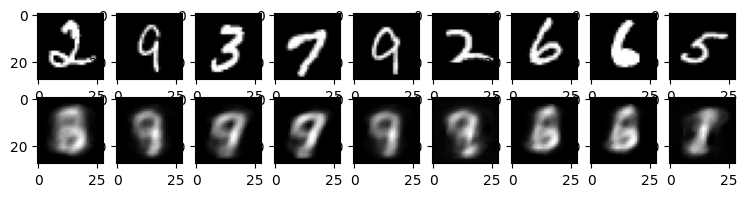

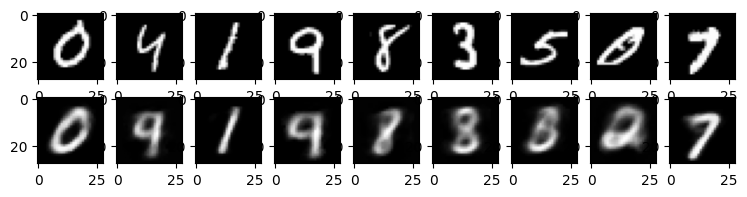

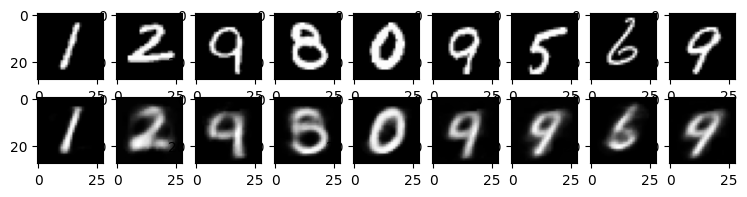

In [24]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()

    # detach and convert to numpy
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()

    # original images
    for i, item in enumerate(imgs):
        if i >= 9 : break
        plt.subplot(2, 9, i + 1)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])

    # reconstructed images
    for i, item in enumerate(recon):
        if i >= 9 : break
        plt.subplot(2, 9, i + 10)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])